## Spark Fund Investment Analysis

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv(r'companies.txt', sep = '\t', encoding = 'ISO-8859-1')     #Reading the companies and rounds2 files into dataframe
df2 = pd.read_csv(r'rounds2.csv', encoding = 'ISO-8859-1')
df1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Converting the unique key column to lower case to ensure proper number of values and no duplicates due to case

In [316]:
df1['permalink'] = df1['permalink'].str.lower()
len(df1.permalink.unique())

66368

In [317]:
df2['company_permalink'] = df2['company_permalink'].str.lower()
len(df2.company_permalink.unique())

66370

company permalinks which are in the 'rounds' file but not in 'companies'

In [318]:
df2.loc[~df2['company_permalink'].isin(df1['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Encoding using utf-8 and then decoding using ascii to remove the special characters added. This is as per the stackoverflow answer

In [319]:
df2['company_permalink'] = df2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
df2.loc[~df2['company_permalink'].isin(df1['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


Checking the length of unique companies

In [320]:
len(df2.company_permalink.unique())

66368

Now both the dataframes contain the same number of company count

Following the same process to check permalink in companies but not in rounds and removing special characters

In [321]:
df1.loc[~df1['permalink'].isin(df2['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [322]:
df1['permalink'] = df1.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
df1.loc[~df1['permalink'].isin(df2['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Merging the 2 dataframes to create master dataframe

In [323]:
master_frame = pd.merge(df1, df2, how='inner', left_on='permalink', right_on='company_permalink')
master_frame.shape

(114949, 16)

So the master frame contains 114949 entries. Now let us check the percentage of null values in each column

In [324]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Removing the unwanted columns from the dataframe. Raised_amount_usd is the most needed column

In [325]:
master_frame = master_frame.drop(['company_permalink', 'funding_round_code', 'founded_at', 'homepage_url', 'state_code'], axis = 1)

In [326]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [327]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

Removing the null values from the column as the data is spread a lot and mean is not useful. Max value is a lot higher than the mean value. This means that there are a lot of outliers in the column

In [328]:
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]
master_frame = master_frame[pd.notnull(master_frame['country_code'])]
master_frame = master_frame[pd.notnull(master_frame['category_list'])]
master_frame = master_frame[pd.notnull(master_frame['region'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
region                     0.0
city                       0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

Left with around 76% of data after removing the null values and cleaning the data

In [329]:
100*(len(master_frame.index) / len(df2.index))

75.98587199540667

As the requirement suggests, Selecting only those items having funding type as venture, angel, seed, and private equity 

In [330]:
funding_df = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'private_equity')]

###### Below plot shows the log scaled values of funding type vs raised amount(usd). It can be clearly seen that there are many outliers pulling the mean value up

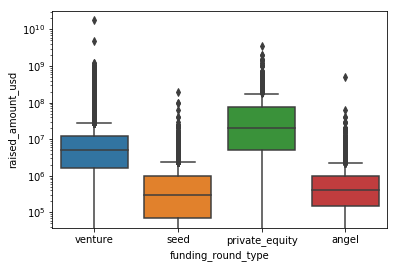

In [331]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=funding_df)
plt.yscale('log')
plt.show()

In [332]:
funding_df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.087214e+07
venture           1.174202e+07
angel             9.728313e+05
seed              7.446514e+05
Name: raised_amount_usd, dtype: float64

In [333]:
funding_df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               418146.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

Mean and median has a lot of difference in the values. Also mean has a lot of high values or outliers causing the mean to be very high(above the spark investment range). 
###### So median is considered and the most relevant funding type is "venture" as the value is 5million and lies in the range of spark investment

In [334]:
country_df = funding_df[funding_df['funding_round_type'] == 'venture']
country_df.head()

,permalink,name,category_list,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


Taking out only the preferred "venture" funding into another dataframe and selecting the top 9 countries based on the raised amount(USD)

In [335]:
top9 = country_df.groupby('country_code')['raised_amount_usd'].agg(['sum']).sort_values('sum', ascending=False)[:9]
top9

,sum
country_code,
USA,4.194432e+11
CHN,3.695087e+10
GBR,1.923553e+10
IND,1.416781e+10
CAN,9.435487e+09
FRA,6.825021e+09
ISR,6.551761e+09
DEU,6.180782e+09
JPN,3.018150e+09


###### A log scaled plot showing the top 9 countries vs the raised amount(USD). It can be clearly seen that USA, China and Great Britain are the top 3 countries

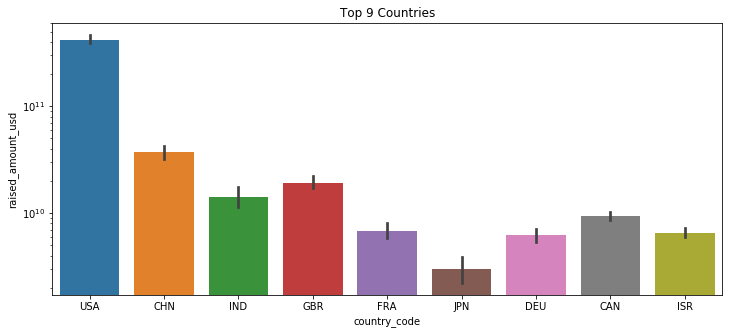

In [384]:
top9_countries = country_df[(country_df['country_code'] == 'USA') | (country_df['country_code'] == 'CHN') | (country_df['country_code'] == 'GBR') | (country_df['country_code'] == 'IND') | (country_df['country_code'] == 'CAN') | (country_df['country_code'] == 'FRA') | (country_df['country_code'] == 'ISR') | (country_df['country_code'] == 'DEU') | (country_df['country_code'] == 'JPN') ]
top9_countries = top9_countries.sort_values('raised_amount_usd', ascending=False)
plt.figure(figsize=(12, 5))
p = sns.barplot(x='country_code', y='raised_amount_usd', data=top9_countries, estimator=np.sum)
plt.title('Top 9 Countries')
plt.yscale('log')

###### As China does not have English as its official language, the top 3 english speaking countries are USA, GBR and IND

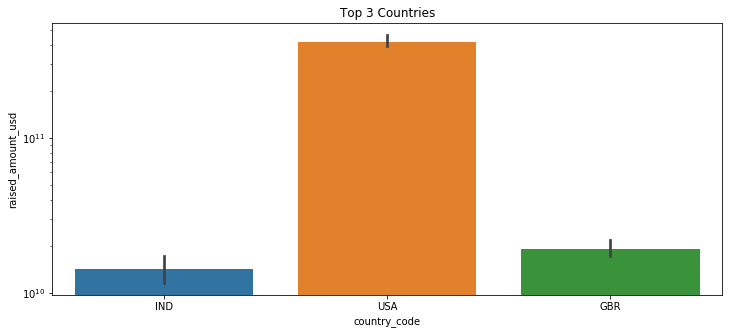

In [375]:
top3_english = country_df[(country_df['country_code'] == 'USA') | (country_df['country_code'] == 'GBR') | (country_df['country_code'] == 'IND')]
plt.figure(figsize=(12, 5))
p = sns.barplot(x='country_code', y='raised_amount_usd', data=top3_english, estimator=np.sum)
plt.title('Top 3 Countries')
plt.yscale('log')

Splitting the category list based on '|' character and creating a new column showing the primary sector

In [376]:
sector = lambda category_list : category_list.split('|')[0]
top3_english.loc[:,'primary_sector'] = top3_english['category_list'].apply(sector)
top3_english.head()

,permalink,name,category_list,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now we read the mapping.csv file and remove the null values if any

In [377]:
mapping_df = pd.read_csv("mapping.csv")
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [378]:
mapping_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [379]:
mapping_df = mapping_df[~pd.isnull(mapping_df.category_list)]
mapping_df.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Coverting the sector column to lower case so that the comparson and merging the frames are easier

In [380]:
top3_english['primary_sector'] = top3_english['primary_sector'].str.lower()
top3_english.head()

C:\Users\vpgurura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,name,category_list,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps


In [381]:
mapping_df['category_list'] = mapping_df['category_list'].str.lower()
mapping_df['category_list'].head(20)

1                        3d
2               3d printing
3             3d technology
4                accounting
5          active lifestyle
6              ad targeting
7        advanced materials
8          adventure travel
9               advertising
10    advertising exchanges
11     advertising networks
12    advertising platforms
13                   advice
14                aerospace
15              agriculture
16    air pollution control
17               algorithms
18              all markets
19             all students
20      alter0tive medicine
Name: category_list, dtype: object

It appears that 'na' is replaced with 0 in the column. So converting '0' back to 'na' to remove the errors

In [382]:
mapping_df['category_list'] = mapping_df['category_list'].apply(lambda x: x.replace('0','na'))
mapping_df['category_list'].head(20)

1                        3d
2               3d printing
3             3d technology
4                accounting
5          active lifestyle
6              ad targeting
7        advanced materials
8          adventure travel
9               advertising
10    advertising exchanges
11     advertising networks
12    advertising platforms
13                   advice
14                aerospace
15              agriculture
16    air pollution control
17               algorithms
18              all markets
19             all students
20     alternative medicine
Name: category_list, dtype: object

Now lets merge the top3_countries and mapping dataframes to create a merged dataframe for further analysis

In [345]:
merged_df = pd.merge(top3_english, mapping_df, how='inner', left_on='primary_sector', right_on='category_list')
merged_df.head()

,permalink,name,category_list_x,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,...,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,...,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,...,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,...,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,...,media,0,0,0,1,0,0,0,0,0


As suggested we now use pd.melt to map the sectors to the respective IDs. So we separate the sectors and IDs and pass them as arguments into pd.melt to create mapped columns variable and value 

In [346]:
merged_df.columns

Index(['permalink', 'name', 'category_list_x', 'status', 'country_code',
       'region', 'city', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'primary_sector', 'category_list_y',
       'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [347]:
ids = merged_df.columns[0:13]
print(ids)

Index(['permalink', 'name', 'category_list_x', 'status', 'country_code',
       'region', 'city', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'primary_sector', 'category_list_y'],
      dtype='object')


In [348]:
values = merged_df.columns[13:23]
print(values)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [349]:
df = pd.melt(merged_df, id_vars=list(ids), value_vars=list(values))
df.head()

,permalink,name,category_list_x,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,variable,value
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,Automotive & Sports,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,Automotive & Sports,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,Automotive & Sports,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,London,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,Automotive & Sports,0
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,Automotive & Sports,0


Now lets select only those entries which has value as 1 and drop the unwanted columns

In [350]:
df = df[df.value == 1]
df.head()

,permalink,name,category_list_x,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,variable,value
25736,/organization/3d-robotics,3D Robotics,Drones|Manufacturing,operating,USA,San Diego,San Diego,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,drones,drones,Automotive & Sports,1
25737,/organization/3d-robotics,3D Robotics,Drones|Manufacturing,operating,USA,San Diego,San Diego,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,drones,drones,Automotive & Sports,1
25738,/organization/3d-robotics,3D Robotics,Drones|Manufacturing,operating,USA,San Diego,San Diego,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,12-09-2013,30000000.0,drones,drones,Automotive & Sports,1
25739,/organization/3d-robotics,3D Robotics,Drones|Manufacturing,operating,USA,San Diego,San Diego,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,25-02-2015,50000000.0,drones,drones,Automotive & Sports,1
25740,/organization/cape-productions,Cape Productions,Drones|Services|Video,operating,USA,SF Bay Area,Redwood City,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,drones,drones,Automotive & Sports,1


In [351]:
df = df.drop(['value', 'category_list_x', 'category_list_y'], axis = 1)
df.head()

,permalink,name,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,variable
25736,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,drones,Automotive & Sports
25737,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,drones,Automotive & Sports
25738,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,12-09-2013,30000000.0,drones,Automotive & Sports
25739,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,25-02-2015,50000000.0,drones,Automotive & Sports
25740,/organization/cape-productions,Cape Productions,operating,USA,SF Bay Area,Redwood City,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,drones,Automotive & Sports


In [352]:
df = df.rename(columns={'variable':'main_sector'})
df.head()

,permalink,name,status,country_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
25736,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,drones,Automotive & Sports
25737,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,drones,Automotive & Sports
25738,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,12-09-2013,30000000.0,drones,Automotive & Sports
25739,/organization/3d-robotics,3D Robotics,operating,USA,San Diego,San Diego,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,25-02-2015,50000000.0,drones,Automotive & Sports
25740,/organization/cape-productions,Cape Productions,operating,USA,SF Bay Area,Redwood City,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,drones,Automotive & Sports


So for the final part we select only those entries with investment between 5m and 15m and rename the variable column to main_sector

In [353]:
df = df[(df['raised_amount_usd'] >= 5000000) & (df['raised_amount_usd'] <= 15000000)]

We now get the top 3 countries, the total number of investment in each sector and the total amount invested

In [356]:
df.groupby(['country_code', 'main_sector'])['raised_amount_usd'].agg(['count', 'sum'])

count           sum
country_code main_sector                                                 
GBR          Automotive & Sports                         14  1.470452e+08
             Cleantech / Semiconductors                 120  1.079398e+09
             Entertainment                               55  4.767237e+08
             Health                                      20  1.867220e+08
             Manufacturing                               38  3.305364e+08
             News, Search and Messaging                  70  5.981207e+08
             Others                                     145  1.273239e+09
             Social, Finance, Analytics, Advertising    130  1.068995e+09
IND          Automotive & Sports                         12  1.219000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2348  2.161478e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              798  7.249553e+09
             News, Search and Messaging                1581  1.395234e+10
             Others                                    2949  2.630901e+10
             Social, Finance, Analytics, Advertising   2711  2.378738e+10

###### The log scaled plot showing the count of investments and total invested amount of the top 3 english speaking countries in different sectors

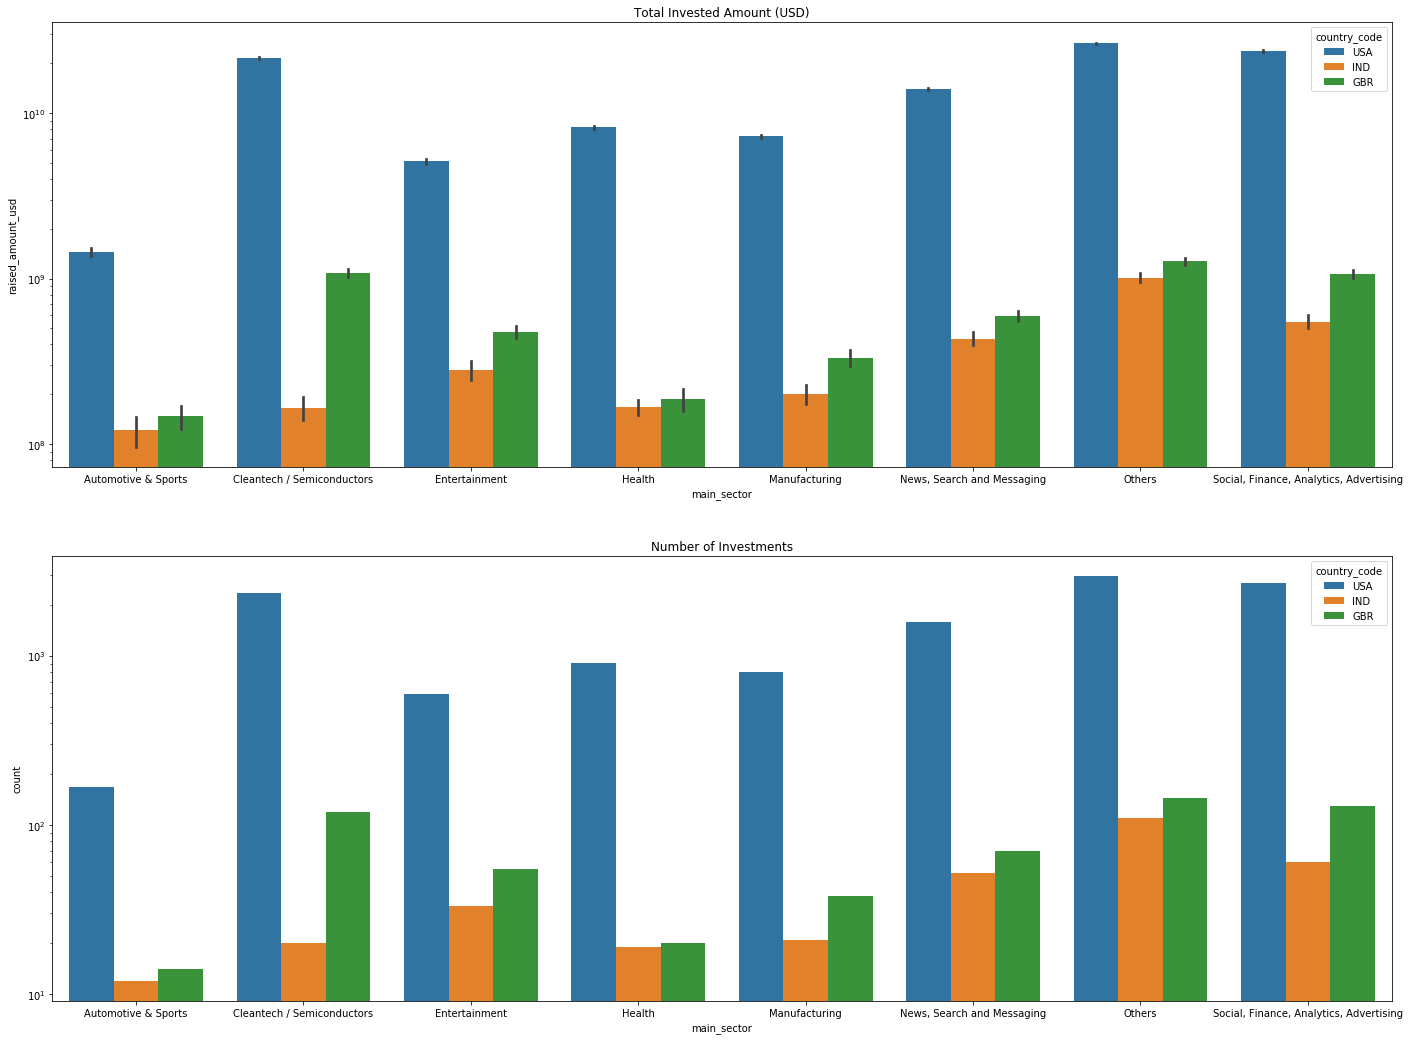

In [357]:
plt.figure(figsize=(24, 18))
plt.subplot(2, 1, 1)
p = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
plt.title('Total Invested Amount (USD)')
plt.yscale('log')

plt.subplot(2, 1, 2)
q = sns.countplot(x='main_sector', hue='country_code', data=df)
plt.title('Number of Investments')
plt.yscale('log')

plt.show()

In [358]:
C1 = df[df['country_code'] == 'USA']
C2 = df[df['country_code'] == 'GBR']
C3 = df[df['country_code'] == 'IND']

###### Country-wise sorted values showing the count and total investment in each sector in descending order
Top 3 sectors for USA are 'Others', 'Social, Finance, Analytics, Advertising' and 'Cleantech / Semiconductors' 

In [359]:
D1 = C1.groupby(['country_code', 'main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values('count', ascending=False)
D1

count           sum
country_code main_sector                                                 
USA          Others                                    2949  2.630901e+10
             Social, Finance, Analytics, Advertising   2711  2.378738e+10
             Cleantech / Semiconductors                2348  2.161478e+10
             News, Search and Messaging                1581  1.395234e+10
             Health                                     909  8.211859e+09
             Manufacturing                              798  7.249553e+09
             Entertainment                              591  5.099198e+09
             Automotive & Sports                        167  1.454104e+09

Top 3 sectors for GBR are 'Others', 'Social, Finance, Analytics, Advertising' and 'Cleantech / Semiconductors'

In [360]:
D2 = C2.groupby(['country_code', 'main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values('count', ascending=False)
D2

count           sum
country_code main_sector                                                 
GBR          Others                                     145  1.273239e+09
             Social, Finance, Analytics, Advertising    130  1.068995e+09
             Cleantech / Semiconductors                 120  1.079398e+09
             News, Search and Messaging                  70  5.981207e+08
             Entertainment                               55  4.767237e+08
             Manufacturing                               38  3.305364e+08
             Health                                      20  1.867220e+08
             Automotive & Sports                         14  1.470452e+08

Top 3 sectors for IND are 'Others', 'Social, Finance, Analytics, Advertising' and 'News, Search and Messaging'

In [361]:
D3 = C3.groupby(['country_code', 'main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values('count', ascending=False)
D3

count           sum
country_code main_sector                                                 
IND          Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
             News, Search and Messaging                  52  4.338345e+08
             Entertainment                               33  2.808300e+08
             Manufacturing                               21  2.009000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Health                                      19  1.677400e+08
             Automotive & Sports                         12  1.219000e+08

Now we find the total number of investment and total amount invested for each country
###### USA - 12054 and 107.7 billion
###### GBR - 592 and 5.1 billion
###### IND - 327 and 2.9 billion

In [362]:
D1['count'].sum()

12054

In [363]:
D2['count'].sum()

592

In [364]:
D3['count'].sum()

327

In [365]:
D1['sum'].sum()

107678217294.0

In [366]:
D2['sum'].sum()

5160779990.0

In [367]:
D3['sum'].sum()

2934543602.0

Now for the final part to get the company which has invested the maximum amount in the top 2 sectors. We group the individual country dataframe based on the company and main sector to get the required output
###### USA - /organization/virtustream (Others) and /organization/shotspotter (Social, Finance, Analytics, Advertising)
###### GBR - /organization/electric-cloud (Others) and /organization/celltick-technologies (Social, Finance, Analytics, Advertising)
###### IND - /organization/firstcry-com (Others) and /organization/manthan-systems (Social, Finance, Analytics, Advertising)

In [368]:
C1.groupby(['permalink', 'main_sector'])['raised_amount_usd'].agg(['sum']).sort_values('sum', ascending=False).head(10)

,,sum
permalink,main_sector,
/organization/airspan-networks,"News, Search and Messaging",81769000.0
/organization/biodesix,Cleantech / Semiconductors,75300000.0
/organization/avnera,Entertainment,71062970.0
/organization/tigo-energy,Cleantech / Semiconductors,68739496.0
/organization/shotspotter,"Social, Finance, Analytics, Advertising",67933006.0
/organization/endogastric-solutions,Health,67896724.0
/organization/virtustream,Others,64300000.0
/organization/demandbase,"Social, Finance, Analytics, Advertising",63000000.0
/organization/intacct,"Social, Finance, Analytics, Advertising",61800000.0


In [369]:
C2.groupby(['permalink', 'main_sector'])['raised_amount_usd'].agg(['sum']).sort_values('sum', ascending=False).head(10)

,,sum
permalink,main_sector,
/organization/greenroad-technologies,Automotive & Sports,52500000.0
/organization/celltick-technologies,"Social, Finance, Analytics, Advertising",37500000.0
/organization/ubiquisys,"News, Search and Messaging",37000000.0
/organization/electric-cloud,Others,37000000.0
/organization/sensage,Others,36250000.0
/organization/shozu,"News, Search and Messaging",36000000.0
/organization/eusa-pharma,Cleantech / Semiconductors,35600000.0
/organization/autoquake,Automotive & Sports,35557140.0
/organization/mythings,"Social, Finance, Analytics, Advertising",34000000.0


In [370]:
C3.groupby(['permalink', 'main_sector'])['raised_amount_usd'].agg(['sum']).sort_values('sum', ascending=False).head(10)

,,sum
permalink,main_sector,
/organization/manthan-systems,"Social, Finance, Analytics, Advertising",50700000.0
/organization/azure-power,Cleantech / Semiconductors,47200000.0
/organization/firstcry-com,Others,39000000.0
/organization/myntra,Others,38000000.0
/organization/gupshup-technology-india-pvt-ltd,"News, Search and Messaging",33000000.0
/organization/commonfloor,Others,32900000.0
/organization/perfint-healthcare,Cleantech / Semiconductors,29200000.0
/organization/makemytrip-com,Automotive & Sports,28000000.0
/organization/komli-media,"Social, Finance, Analytics, Advertising",28000000.0
